# Notación Big‑O en Python 3

Este cuaderno explica **Big‑O** de forma práctica y visual.

## Objetivos
- Entender qué mide Big‑O y qué *no* mide
- Identificar complejidad temporal y espacial en ejemplos comunes
- Reconocer patrones típicos: **O(1), O(log n), O(n), O(n log n), O(n²)**
- Medir (aproximadamente) tiempos con `timeit` y compararlos con el análisis teórico


## 1) ¿Qué es Big‑O?

**Big‑O** describe cómo crece el costo de un algoritmo cuando crece el tamaño de entrada `n`.

- Se enfoca en el **comportamiento asintótico** (cuando `n` es grande).
- Ignora constantes y detalles de hardware.
- Es una herramienta para comparar algoritmos *por escalabilidad*.

📌 Intuición:
- `O(n)` significa: si duplico `n`, el trabajo se duplica aproximadamente.
- `O(n²)` significa: si duplico `n`, el trabajo se multiplica ~4×.


## 2) Reglas rápidas

### A) Constantes se ignoran
- `O(2n)` → `O(n)`
- `O(100)` → `O(1)`

### B) Sumas: domina el término más grande
- `O(n) + O(n²)` → `O(n²)`

### C) Bucles anidados multiplican
- Bucle dentro de bucle (ambos sobre `n`) → `O(n²)`

### D) Partir el problema a la mitad suele dar logaritmos
- Búsqueda binaria → `O(log n)`


## 3) Tabla rápida de complejidades comunes

| Complejidad | Nombre común | Ejemplo típico |
|---|---|---|
| `O(1)` | constante | acceder a `arr[i]` |
| `O(log n)` | logarítmica | búsqueda binaria |
| `O(n)` | lineal | recorrer una lista |
| `O(n log n)` | casi lineal | mergesort, quicksort promedio |
| `O(n²)` | cuadrática | doble bucle |
| `O(2^n)` | exponencial | fuerza bruta |
| `O(n!)` | factorial | permutaciones |


## 4) Ejemplos en Python (análisis + código)

### 4.1 O(1) — constante
Acceder a una posición en una lista no depende de `n`.


In [1]:
def get_middle(arr):
    """O(1): acceso directo por índice."""
    return arr[len(arr)//2]

get_middle(list(range(10)))

5

### 4.2 O(n) — lineal
Recorrer todos los elementos es proporcional al tamaño de entrada.


In [2]:
def sum_all(arr):
    """O(n): recorre todos los elementos una vez."""
    total = 0
    for x in arr:
        total += x
    return total

sum_all([1,2,3,4])

10

### 4.3 O(n²) — cuadrática
Dos bucles anidados sobre `n` generan un crecimiento cuadrático.


In [3]:
def pairs_count(arr):
    """O(n²): cuenta pares (i, j) sin guardarlos para ahorrar memoria."""
    c = 0
    for _ in arr:
        for _ in arr:
            c += 1
    return c

pairs_count([1,2,3])

9

### 4.4 O(log n) — búsqueda binaria (lista ordenada)
Cada paso reduce el espacio de búsqueda a la mitad.


In [4]:
def binary_search(sorted_arr, target):
    """O(log n): búsqueda binaria en lista ordenada."""
    lo, hi = 0, len(sorted_arr) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if sorted_arr[mid] == target:
            return mid
        if sorted_arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1
    return -1

binary_search(list(range(0, 100, 2)), 42)

21

## 5) Complejidad oculta en operaciones comunes de Python

- `arr.append(x)` → **O(1) amortizado**
- `arr.pop()` (al final) → **O(1)**
- `arr.insert(0, x)` → **O(n)** (desplaza elementos)
- `x in arr` (lista) → **O(n)**
- `x in set` / `x in dict` → **O(1) promedio**


In [5]:
data = list(range(10))
data.insert(0, 999)  # O(n)
data.pop(0)          # O(n)
data.append(111)     # O(1) amortizado
data.pop()           # O(1)
data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 6) Medición práctica con `timeit` (aproximada)

Big‑O es teoría (crecimiento). `timeit` nos ayuda a ver una señal práctica.

⚠️ Lo importante es la **tendencia**, no el número exacto.


In [6]:
import timeit

def measure_linear(n, repeats=8):
    arr = list(range(n))
    timer = timeit.Timer(lambda: sum_all(arr))
    return min(timer.repeat(repeat=repeats, number=1))

sizes = [1_000, 2_000, 4_000, 8_000, 16_000, 32_000, 64_000]
times_linear = [measure_linear(n) for n in sizes]
list(zip(sizes, times_linear))

[(1000, 6.510000093840063e-05),
 (2000, 8.379999781027436e-05),
 (4000, 0.0002614000113680959),
 (8000, 0.0005432000034488738),
 (16000, 0.0006756000075256452),
 (32000, 0.0014270999963628128),
 (64000, 0.0035761000035563484)]

### Visualización simple (matplotlib)
Graficamos tamaños vs tiempos para observar tendencia.


Text(0, 0.5, 'segundos (aprox)')

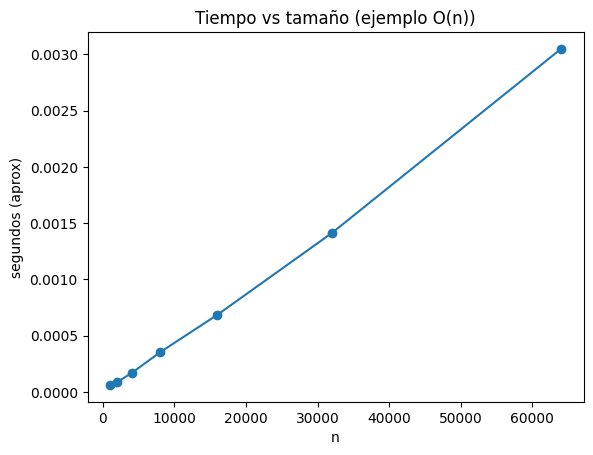

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sizes, times_linear, marker='o')
plt.title('Tiempo vs tamaño (ejemplo O(n))')
plt.xlabel('n')
plt.ylabel('segundos (aprox)')


## 7) Comparación rápida O(n) vs O(n²)

Para que no se tarde demasiado, usamos tamaños más pequeños en `O(n²)`.


In [7]:
def measure_n2(n, repeats=3):
    arr = list(range(n))
    timer = timeit.Timer(lambda: pairs_count(arr))
    return min(timer.repeat(repeat=repeats, number=1))

sizes_n2 = [200, 400, 800, 16000, 32000, 64000]
times_n2 = [measure_n2(n) for n in sizes_n2]
list(zip(sizes_n2, times_n2))

[(200, 0.002633700001752004),
 (400, 0.010609499993734062),
 (800, 0.030999599999631755),
 (16000, 8.33483150000393),
 (32000, 31.92713470000308),
 (64000, 130.61360779999814)]

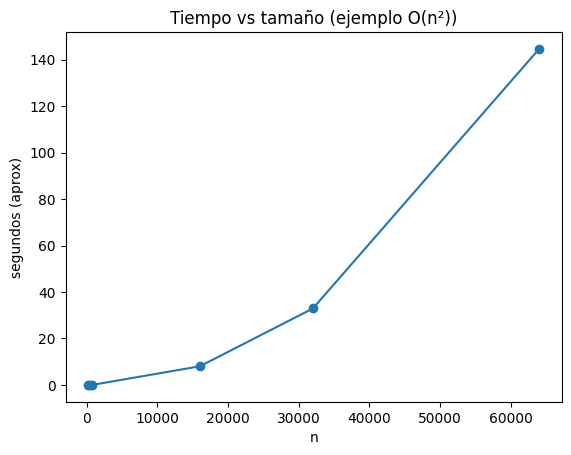

In [ ]:
plt.figure()
plt.plot(sizes_n2, times_n2, marker='o')
plt.title('Tiempo vs tamaño (ejemplo O(n²))')
plt.xlabel('n')
plt.ylabel('segundos (aprox)')
plt.show()

## 8) Complejidad espacial (memoria)

Big‑O también se aplica a memoria.

- Guardar todos los pares consume `O(n²)` memoria.
- Contarlos sin guardarlos consume `O(1)` memoria adicional.


In [ ]:
def all_pairs_memory(arr):
    """O(n²) tiempo y O(n²) memoria (guarda todos los pares)."""
    return [(a, b) for a in arr for b in arr]

# Usa tamaños pequeños para evitar alto consumo de memoria.
len(all_pairs_memory(list(range(200))))

40000

## 9) Ejercicios (para clase)

1. Determina el Big‑O de:
   - Un bucle que recorre `n` elementos y dentro hace una operación O(1)
   - Dos bucles anidados de `n`
   - Búsqueda en `list` vs búsqueda en `set`

2. Reescribe un ejemplo `O(n²)` a `O(n log n)` usando ordenamiento + búsqueda.

3. Identifica en tu código una operación `insert(0, x)` y cámbiala por una estructura adecuada (`collections.deque`).


In [ ]:
notes = [8, 9, 7, 9, 7, 8, 9, 8, 7, 6]
for i in range(len(notes)):
    notes[i] += 0.5
print(notes)

n = 5
for i in range(1, n + 1):
    for j in range(1, n + 1):
        print(f"{i*j:4}", end=" ")
    print()

    import time
elementos = list(range(10000000))
lista = elementos
conjunto = set(elementos)
elemento_buscado = 9999999

#lista
start = time.time()
if elemento_buscado in lista: # Búsqueda Lineal O(n)
    print("Encontrado en lista")
end = time.time()
print(f"Tiempo lista: {end - start:.5f} s")

#conjunto
start = time.time()
if elemento_buscado in conjunto: # Búsqueda en Conjunto O(1)
    print("Encontrado en conjunto")
end = time.time()
print(f"Tiempo conjunto: {end - start:.5f} s")


#funcion para ordenar y buscar dos numeros que sumen un target
def two_sum_nlogn(nums, target):
    nums.sort()
    
    left = 0
    right = len(nums) - 1
    
    #Búsqueda con dos punteros: O(n)
    while left < right:
        current_sum = nums[left] + nums[right]
        if current_sum == target:
            return [nums[left], nums[right]]
        elif current_sum < target:
            left += 1 # Aumentar la suma
        else:
            right -= 1 # Disminuir la suma
            
    return None

nums = [5, 2, 8, 1,9,6,4,3,7]
target = 10
result = two_sum_nlogn(nums, target)
print(result)

[8.5, 9.5, 7.5, 9.5, 7.5, 8.5, 9.5, 8.5, 7.5, 6.5]
   1    2    3    4    5 
   2    4    6    8   10 
   3    6    9   12   15 
   4    8   12   16   20 
   5   10   15   20   25 
Encontrado en lista
Tiempo lista: 0.07662 s
Encontrado en conjunto
Tiempo conjunto: 0.00000 s
[1, 9]


## 10) Conclusiones

- Big‑O no te da el tiempo exacto, te da **la escalabilidad**.
- Para `n` grande, elegir `O(n log n)` en lugar de `O(n²)` cambia todo.
- En Python, conocer la complejidad de `list`, `set`, `dict` evita cuellos de botella.
